<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev_Report2018/WorldHappinessReport_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)

DistributionObj = Distribution(happiness2018)
CorrelationObj = Correlation(dataset=happiness2018)

happiness2018.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [2]:
happiness2018.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       155 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.8 KB


In [3]:
happiness2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


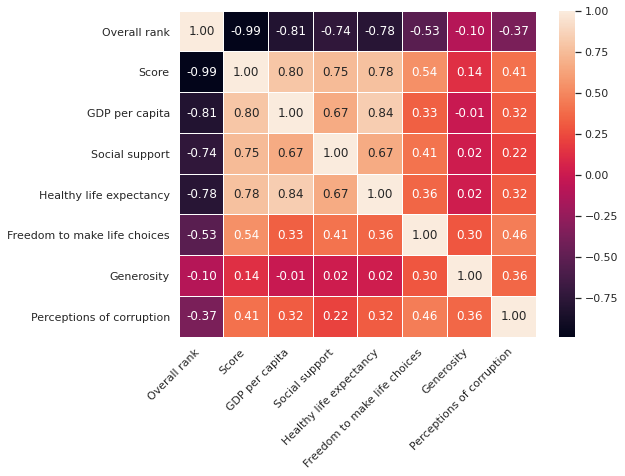

In [4]:
CorrelationObj.addCorrelationmap

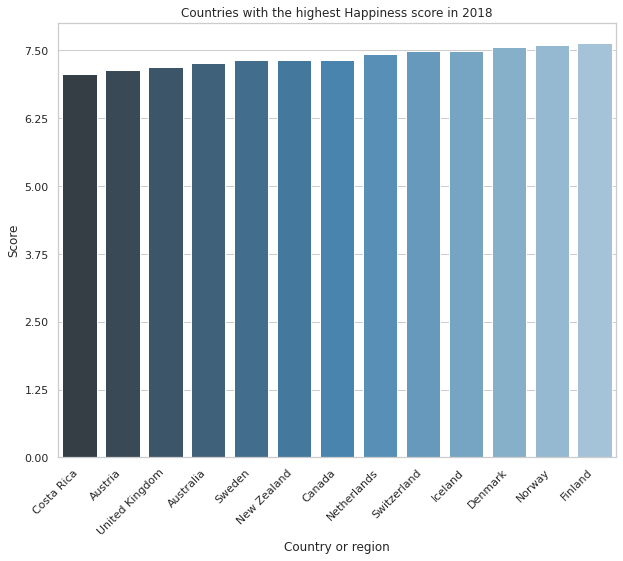

In [5]:
# Countries with the highest Happiness score in 2018
Sortedhappiness2018 = happiness2018.sort_values(by='Score')
Sortedhappiness2018Greaterthan7 = Sortedhappiness2018['Score'] >= 7
Sortedhappiness2018Greaterthan7 = Sortedhappiness2018[Sortedhappiness2018Greaterthan7]

x_data= 'Country or region'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2018Greaterthan7, x=x_data,  y='Score',palette='Blues_d'  )

g.set( xlabel='Country or region', ylabel='Score', title='Countries with the highest Happiness score in 2018')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

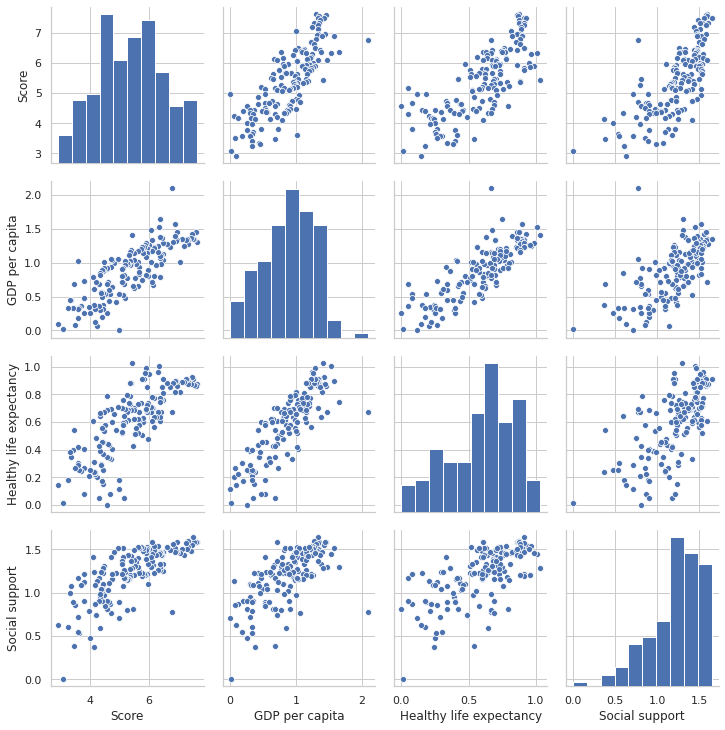

In [6]:
colNames = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Social support']
sns.pairplot(happiness2018[colNames])
plt.show()

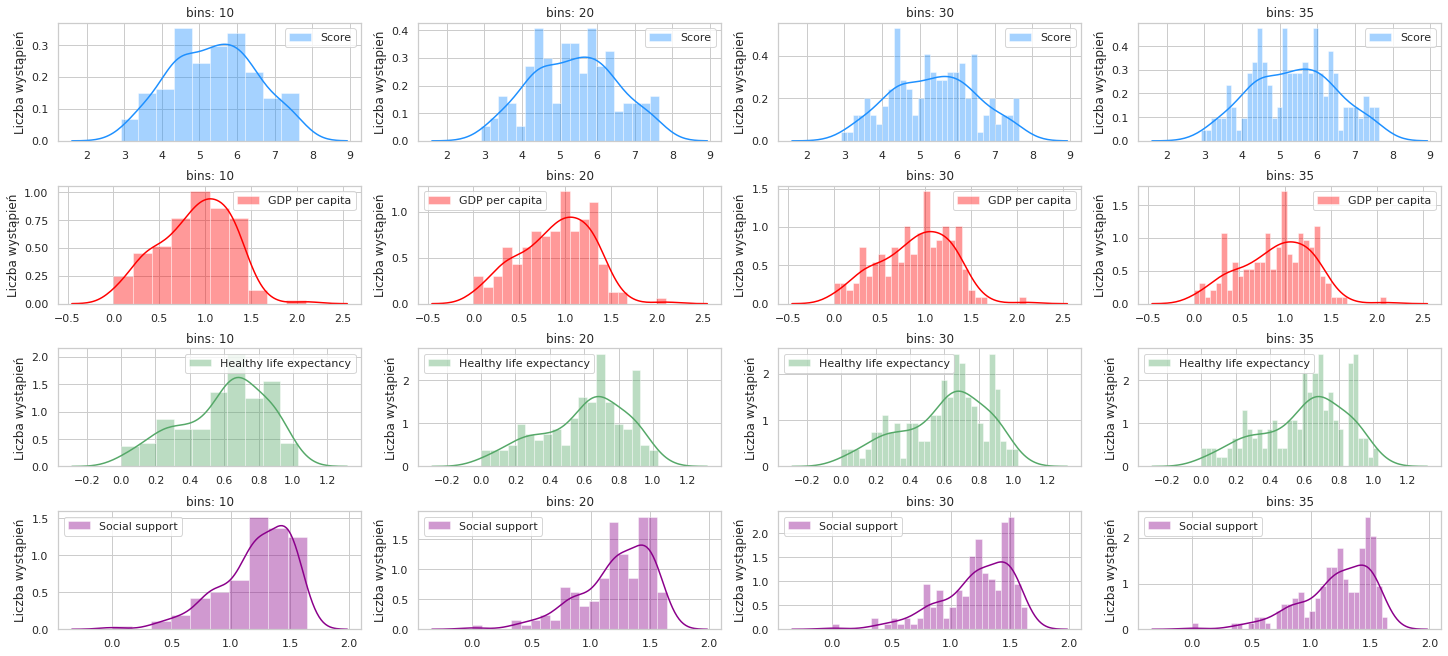

In [7]:
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames, bins=binsValues, set_width=20,  set_height=9)

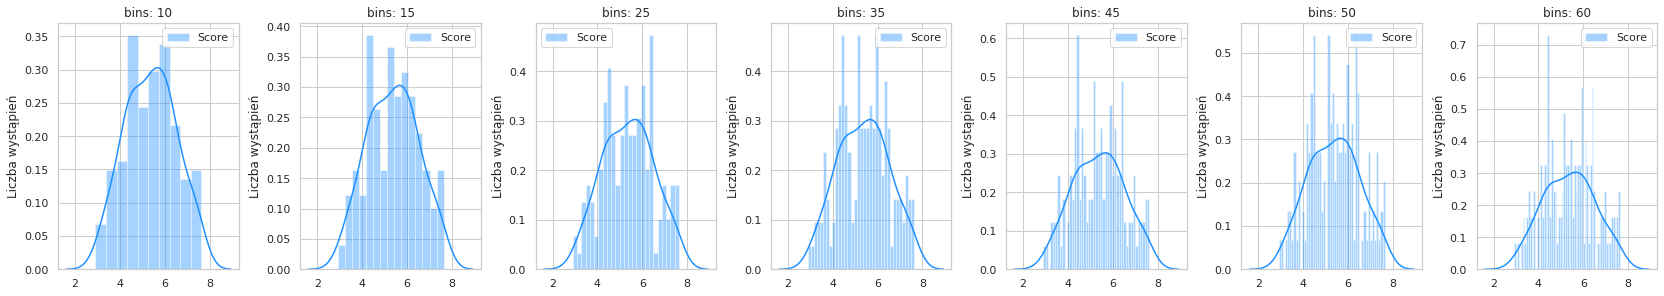

In [8]:
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames[0], bins=binsValues, set_width=23, set_height=4)

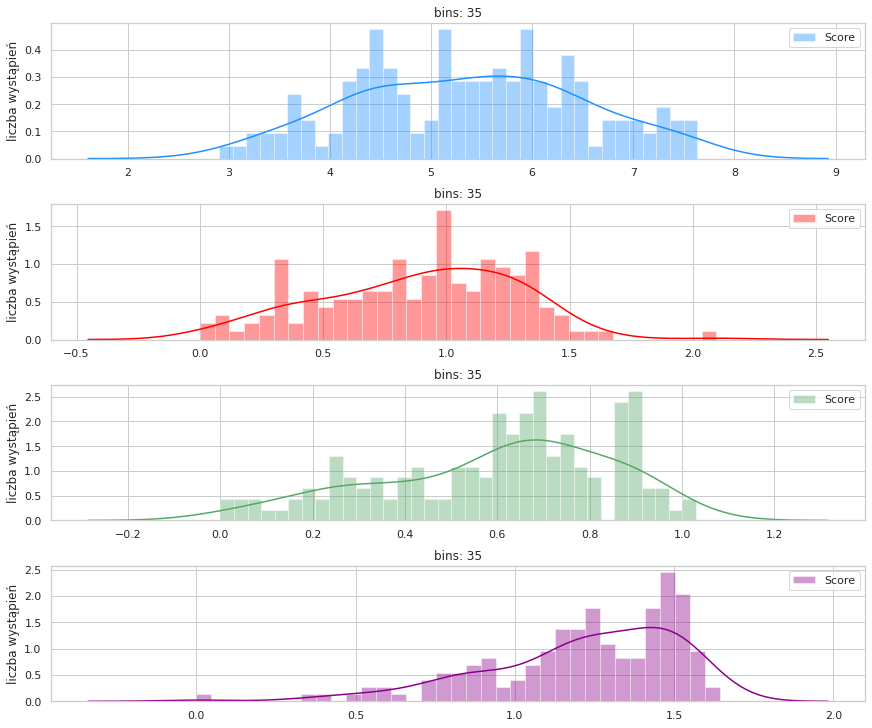

In [9]:
DistributionObj.addHist(value=colNames, bins=35, set_height=10, set_width=12 )

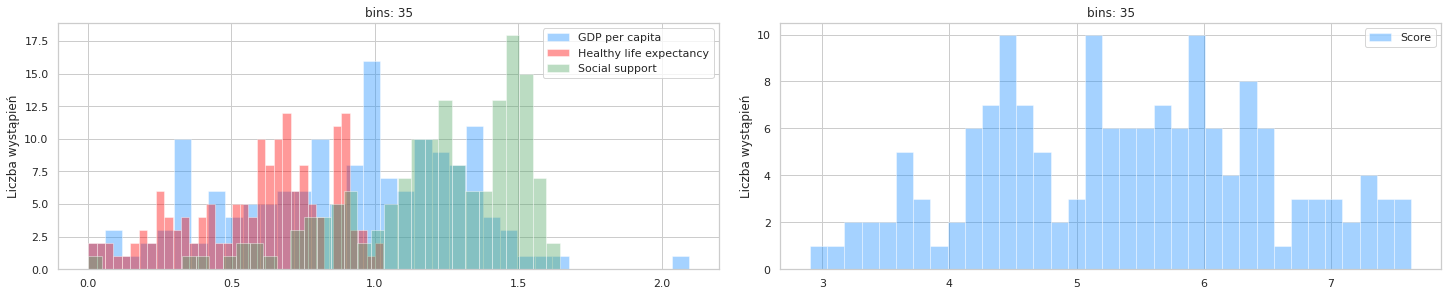

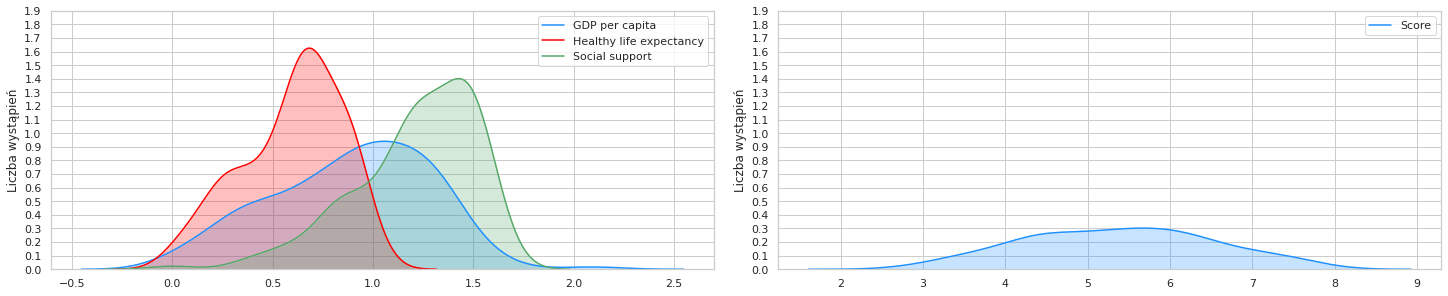

In [10]:
DistributionObj.addStackedHist(list= colNames, bins=35, set_width=20, set_height=4)
DistributionObj.addDensityDistribution(value=colNames, set_width=20, set_height=4)

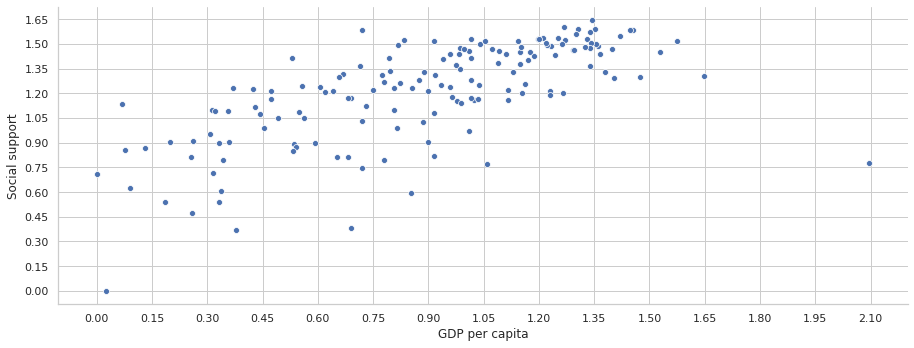

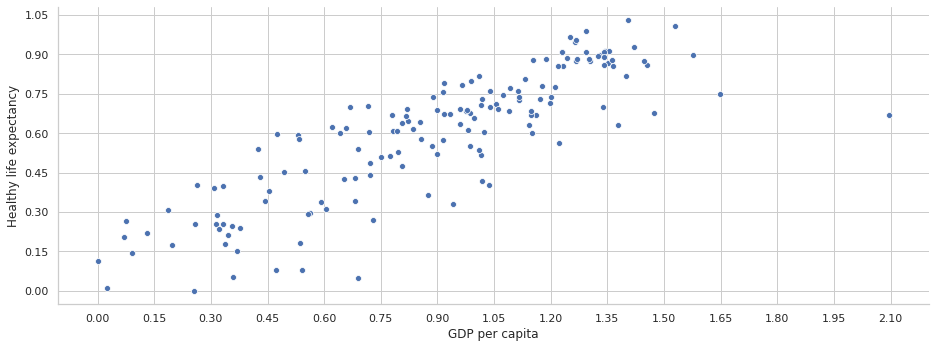

In [11]:
CorrelationObj.addScatterPlot(y_data='Social support', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)
CorrelationObj.addScatterPlot(y_data='Healthy life expectancy', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)

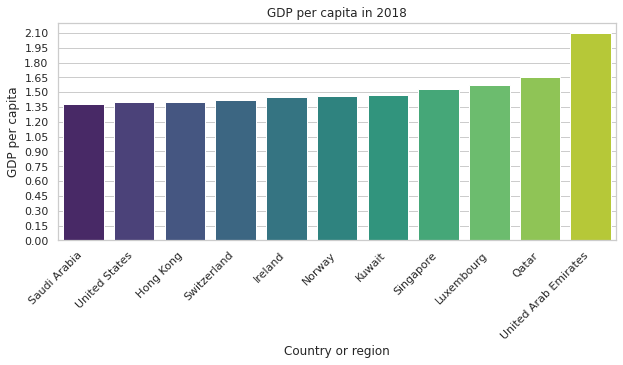

In [12]:
GDPperCapita_greaterThan1dota37 = happiness2018['GDP per capita'] >= 1.37

GDOP_data = happiness2018[GDPperCapita_greaterThan1dota37].sort_values(by='GDP per capita')


sns.set_style('whitegrid') 
plt.figure(figsize=(10,4))
plt.yticks(np.arange(0, 2.15, step=0.15))

g = sns.barplot(  data=GDOP_data, x='Country or region',  y='GDP per capita',palette='viridis'  )

g.set( xlabel='Country or region', ylabel='GDP per capita', title='GDP per capita in 2018')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()